In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga del csv
# ==============================================================================

df = pd.read_csv("insurance.csv")

In [3]:
# Vemos cómo se ve el DF
# ==============================================================================

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Análisis exploratorio
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df["age"].min(), df["age"].max()

(18, 64)

In [6]:
# Número de datos nulos por columna
# ==============================================================================

df.isnull().sum()/100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
# Número de datos duplicados
# ==============================================================================

df.duplicated().sum()

1

In [8]:
# Dropeo de duplicados
# ==============================================================================

df.drop_duplicates(inplace=True)

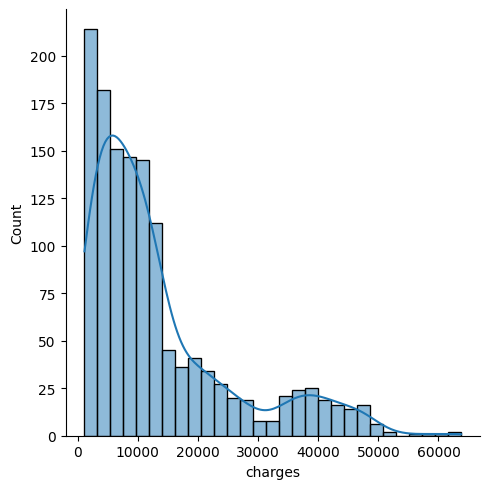

In [9]:
# Displot de charges para ver cómo se distribuyen los datos de nuestra variable predictora
# ==============================================================================

sns.displot(data = df,
             x = "charges",
             kde = True);

In [10]:
# Exploramos cuáles son los principales estadísticos de las variables respuesta
# ==============================================================================

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


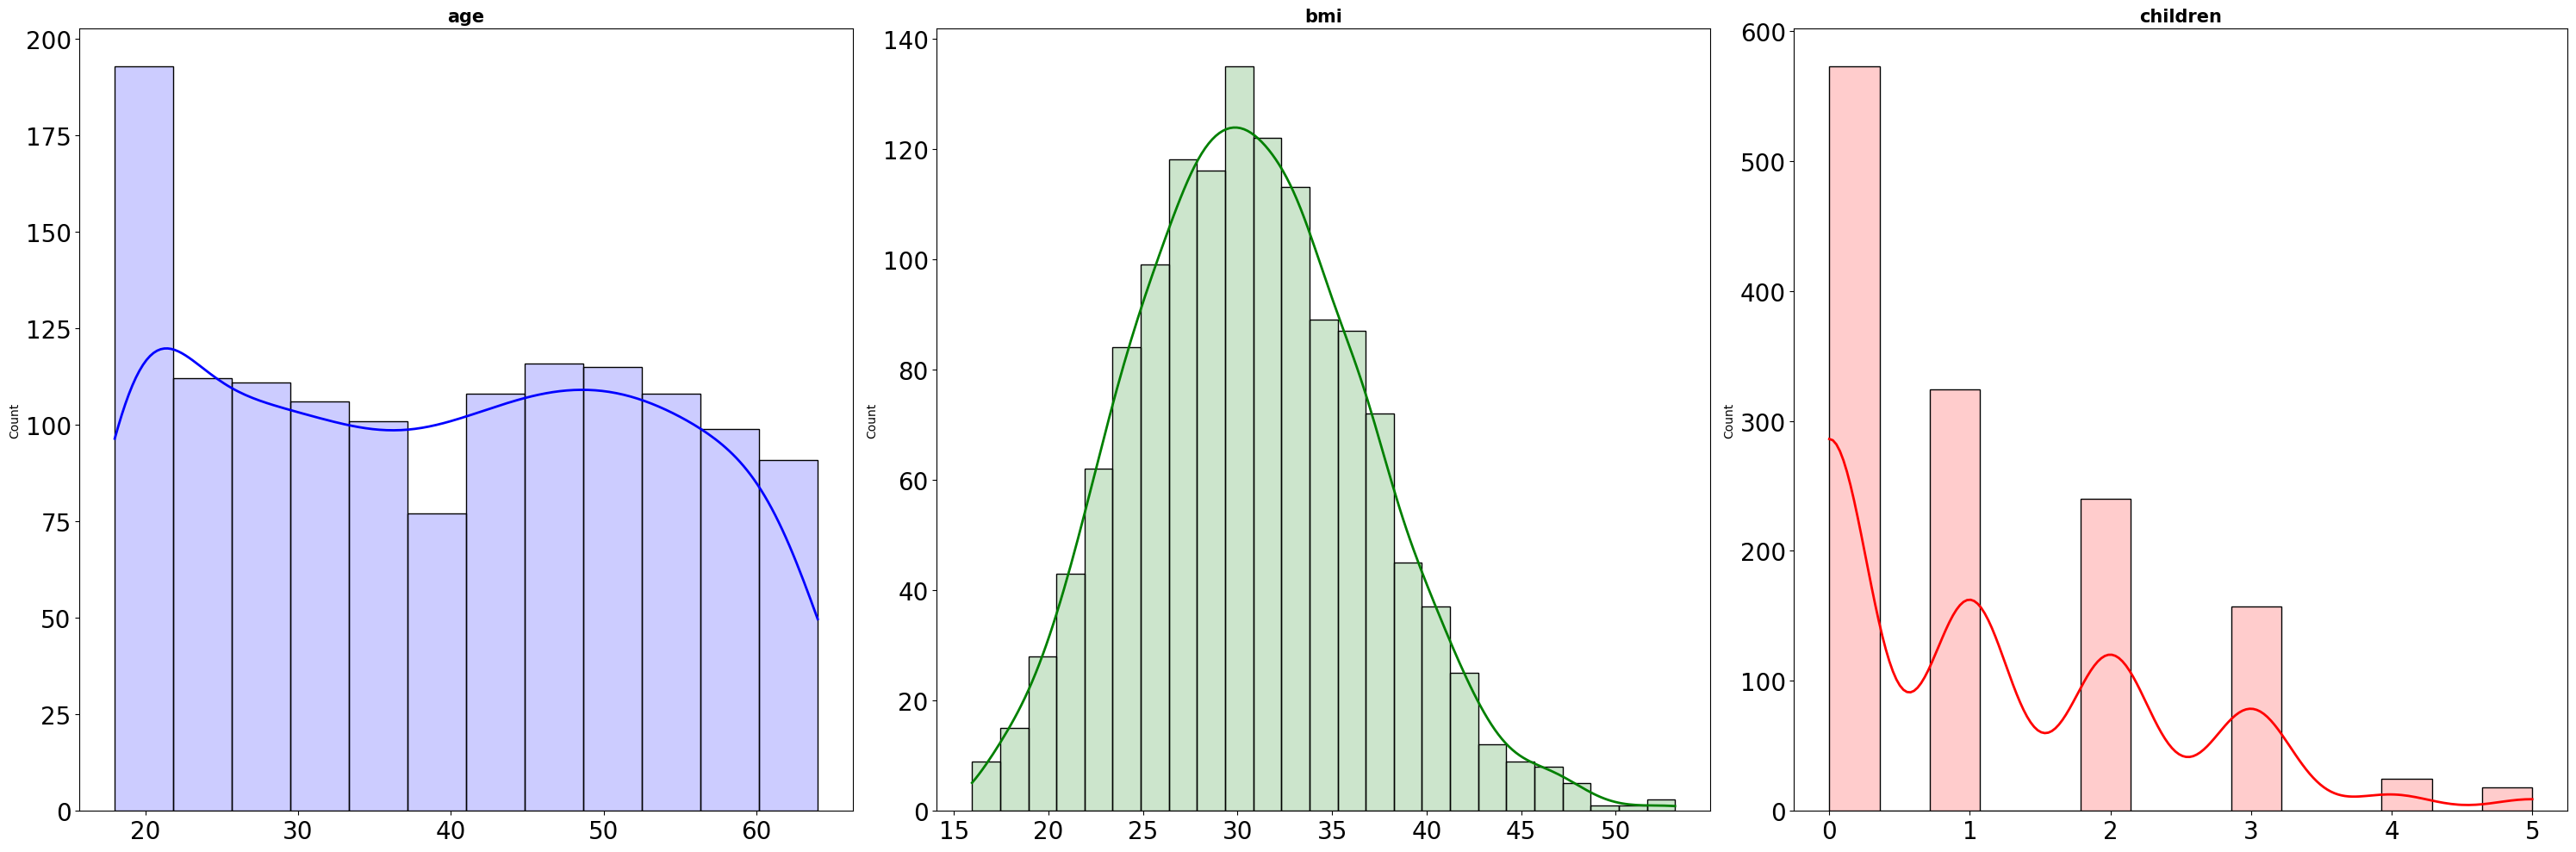

In [11]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

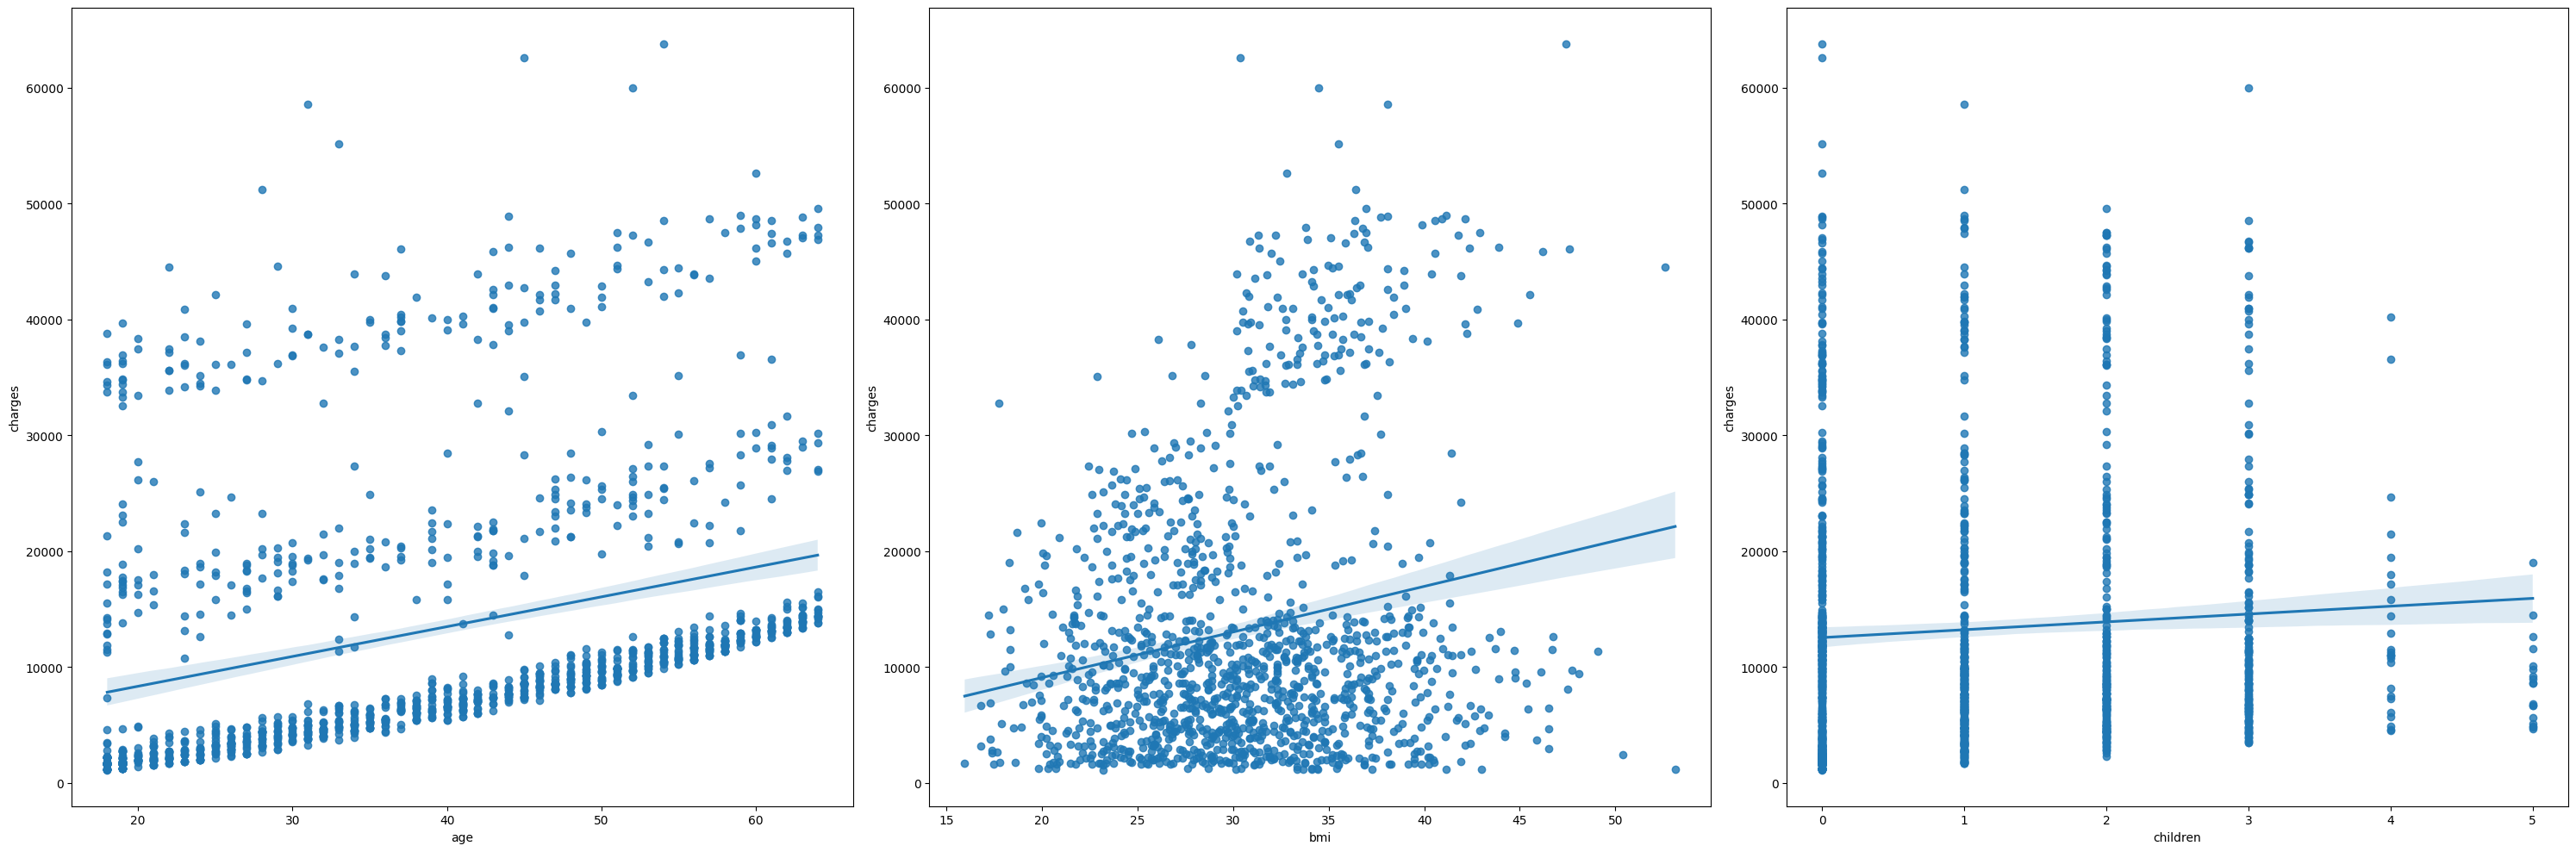

In [12]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
                x = df[colum], 
                y = df["charges"],
                ax = axes[i])

fig.tight_layout();


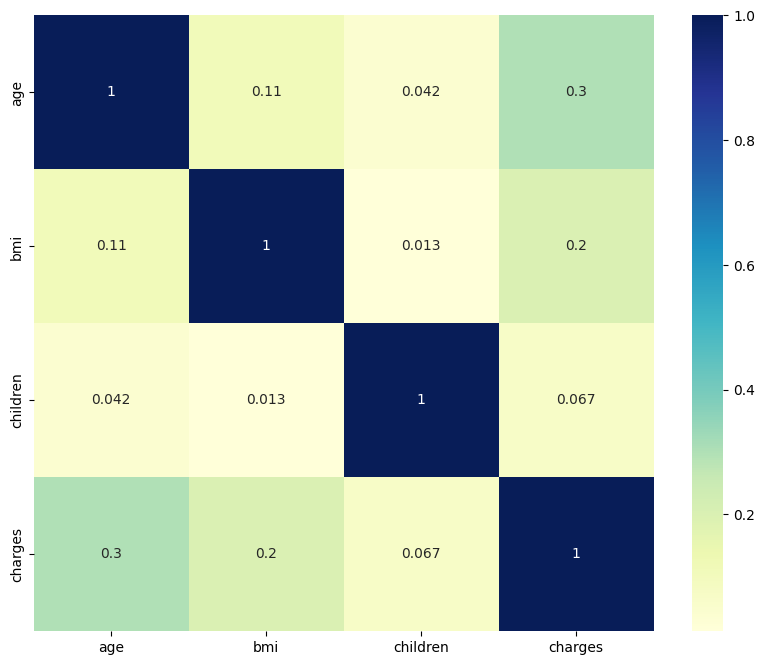

In [13]:
# Correlación entre variables numéricas
# ==============================================================================

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

In [14]:
# Creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación
# ==============================================================================

mask = np.triu(np.ones_like(df.corr()))
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

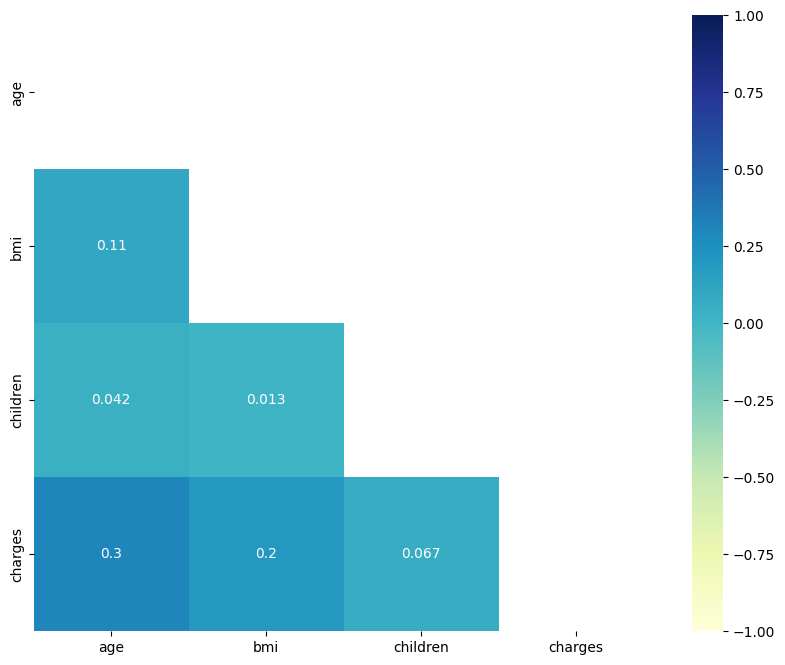

In [15]:
# Correlación entre variables numéricas, de forma más triangular y fácil de ver
# ==============================================================================

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin = -1,
           vmax= 1);

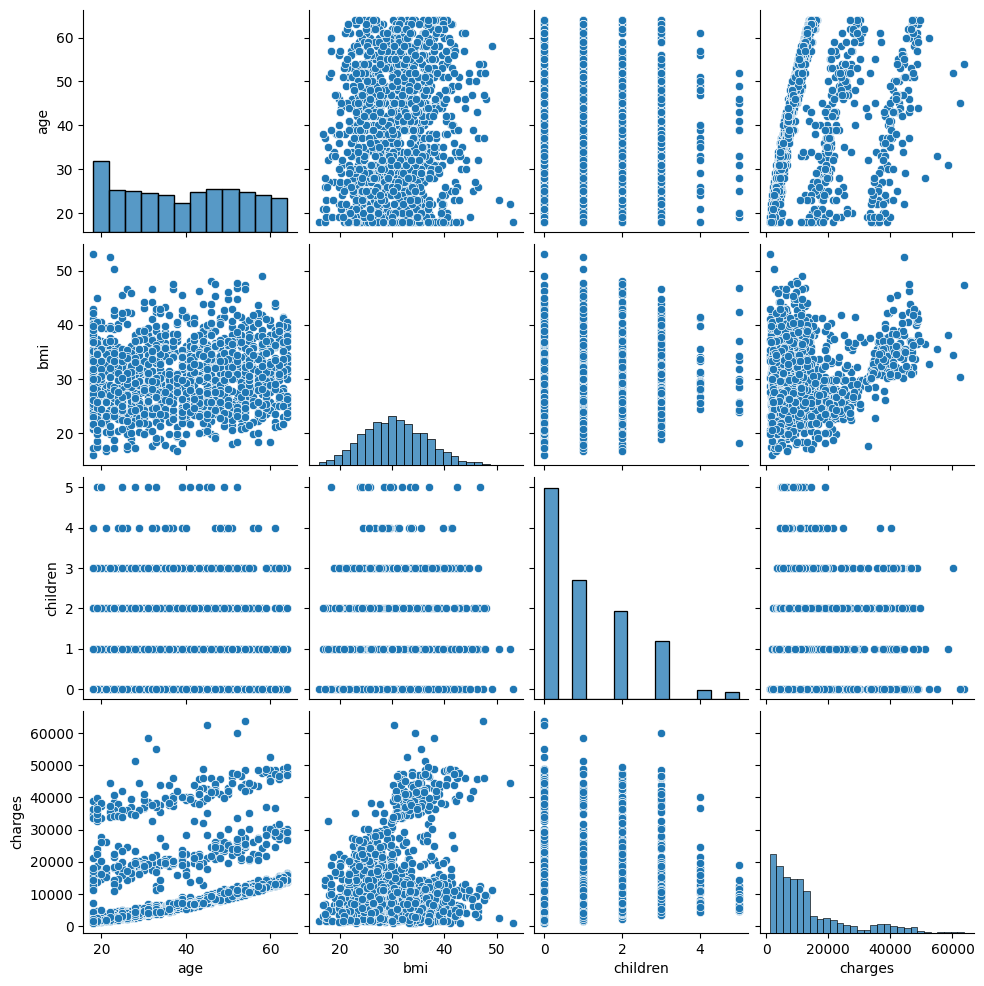

In [16]:
# Correlación entre variables numéricas, más visual
# ==============================================================================

sns.pairplot(data = df);

In [17]:
# Sacamos las variables categóricas
# ==============================================================================

df_categóricas = df.select_dtypes(include= "object")
df_categóricas.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


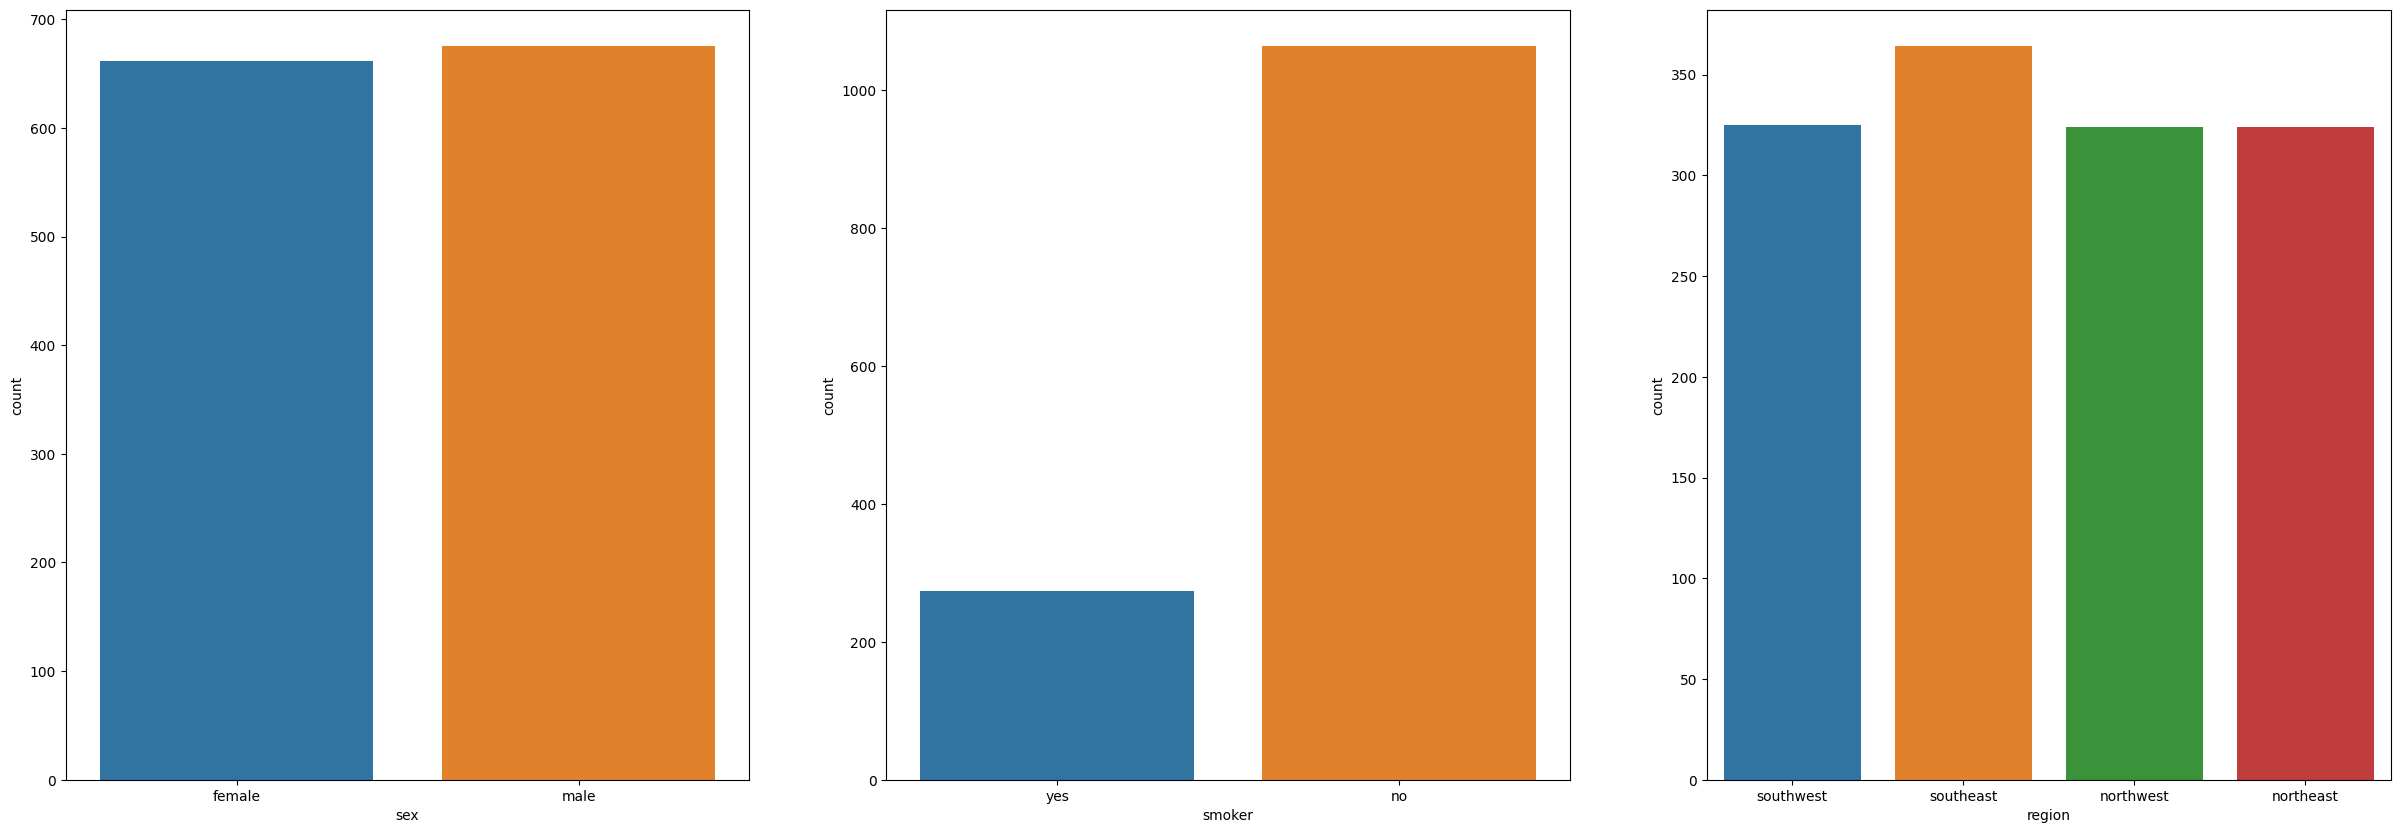

In [18]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))
axes = axes.flat

for i, columna in enumerate(df_categóricas.columns):
    sns.countplot(data = df,
                  x = columna,
                  ax = axes[i]);

In [19]:
df_relación_cate_gen= df.groupby("sex")["charges"].mean().reset_index()
df_relación_cate_gen.head()

,sex,charges
0,female,12569.578844
1,male,13974.998864


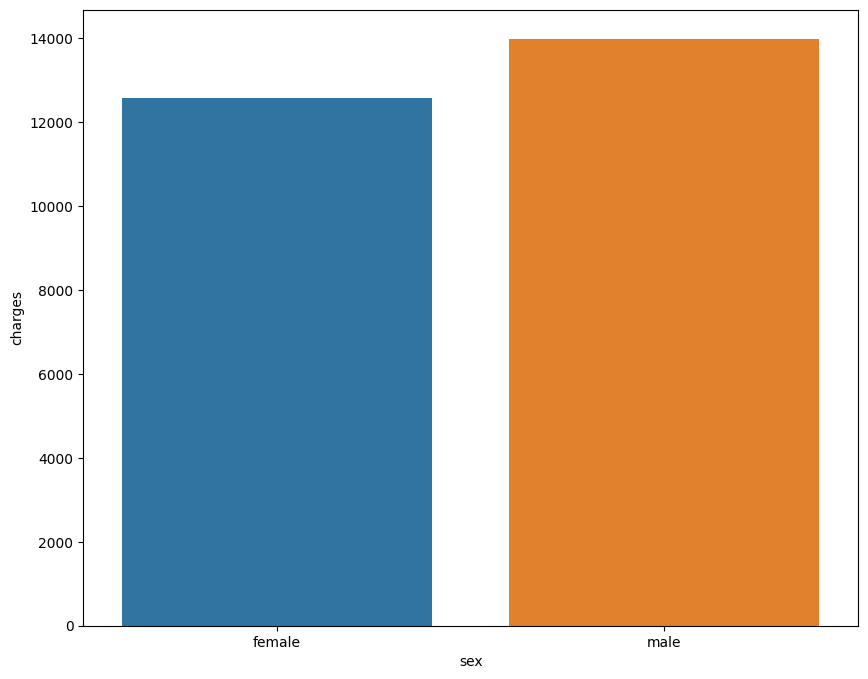

In [20]:
sns.barplot(data = df_relación_cate_gen,
            x = "sex",
            y = "charges");

In [21]:
df_relación_cate_smoke= df.groupby("smoker")["charges"].mean().reset_index()
df_relación_cate_smoke.head()

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


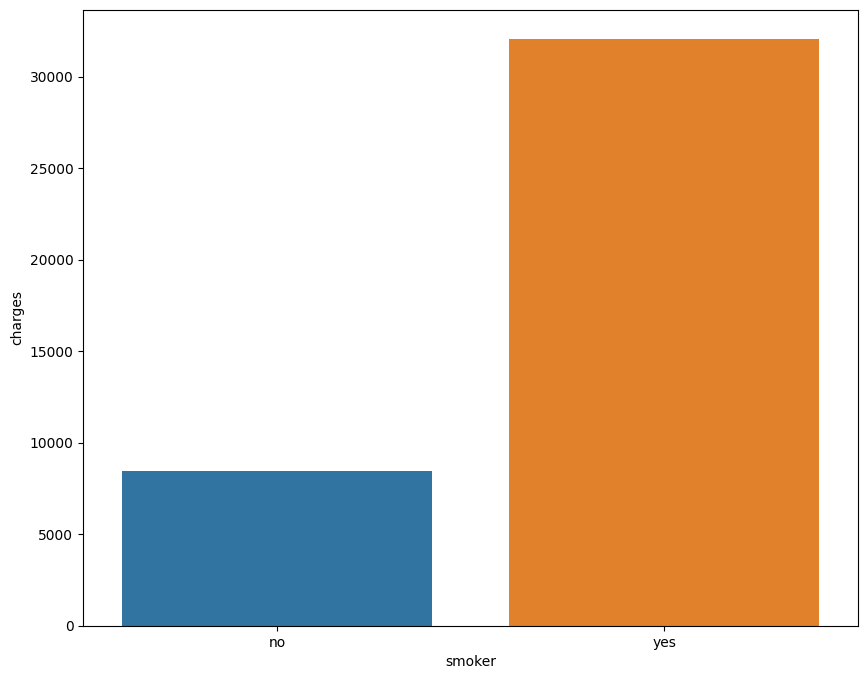

In [22]:
sns.barplot(data = df_relación_cate_smoke,
            x = "smoker",
            y = "charges");

In [23]:
df_relación_cate_reg= df.groupby("region")["charges"].mean().reset_index()
df_relación_cate_reg.head()

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


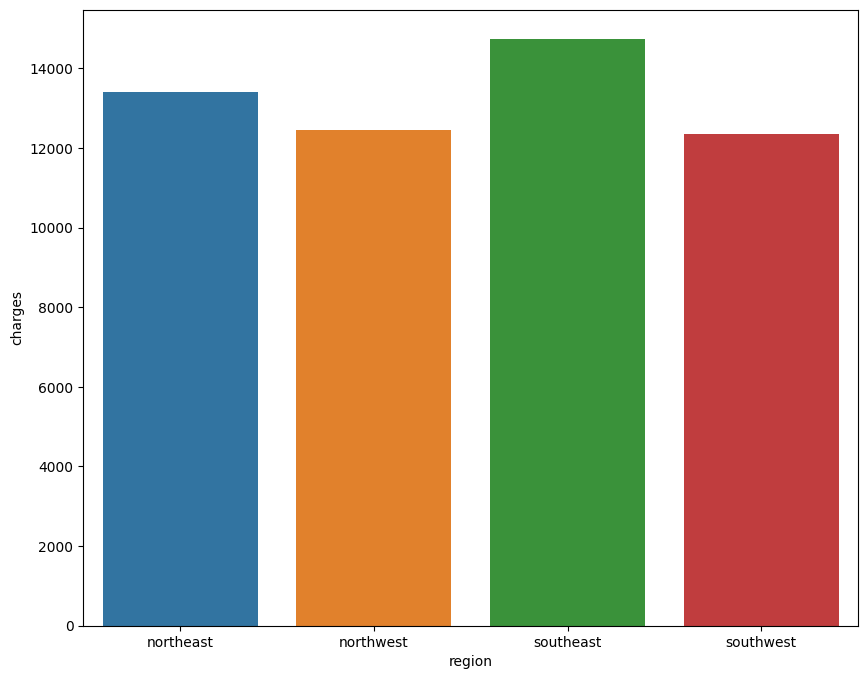

In [24]:
sns.barplot(data = df_relación_cate_reg,
            x = "region",
            y = "charges");

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Seleccionamos solo aquellas variables numéricas
# ==============================================================================

columnas_numeric = df.select_dtypes(include = np.number).columns

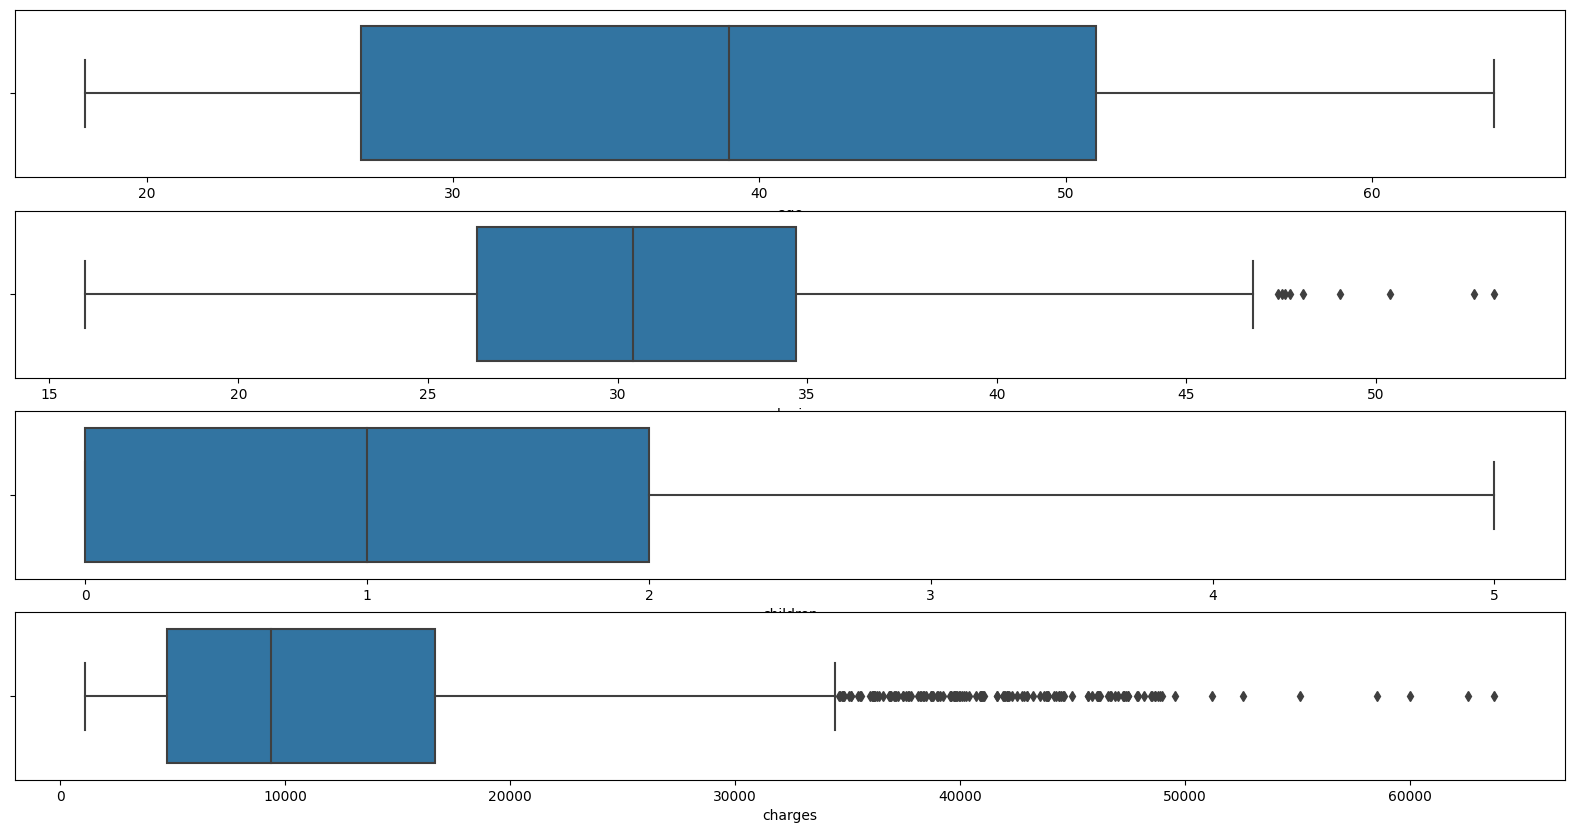

In [27]:
# Sacamos un subplot para detectar outliers
# ==============================================================================

fig, ax = plt.subplots(4, 1, figsize=(20,10))

for i in range(len(columnas_numeric)):
    sns.boxplot(x=columnas_numeric[i], data=df, ax=ax[i])
plt.show()

In [28]:
# Hacemos una función para detectar Outliers
# ==============================================================================

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [29]:
# Almacenamos en una lista el nombre de las columnas numeéricas
# ==============================================================================

lista_columnas = columnas_numeric
lista_columnas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [30]:
# Aplicamos la función y sacamos los índices de los outliers
# ==============================================================================

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'bmi': [116, 286, 401, 543, 847, 860, 1047, 1088, 1317], 'charges': [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]}


In [31]:
# Lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
# ==============================================================================

# Lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    if k == "bmi":
        media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.  
    else: 
        mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = mediana 

In [32]:
df_numericas2 = df.select_dtypes(include = np.number)

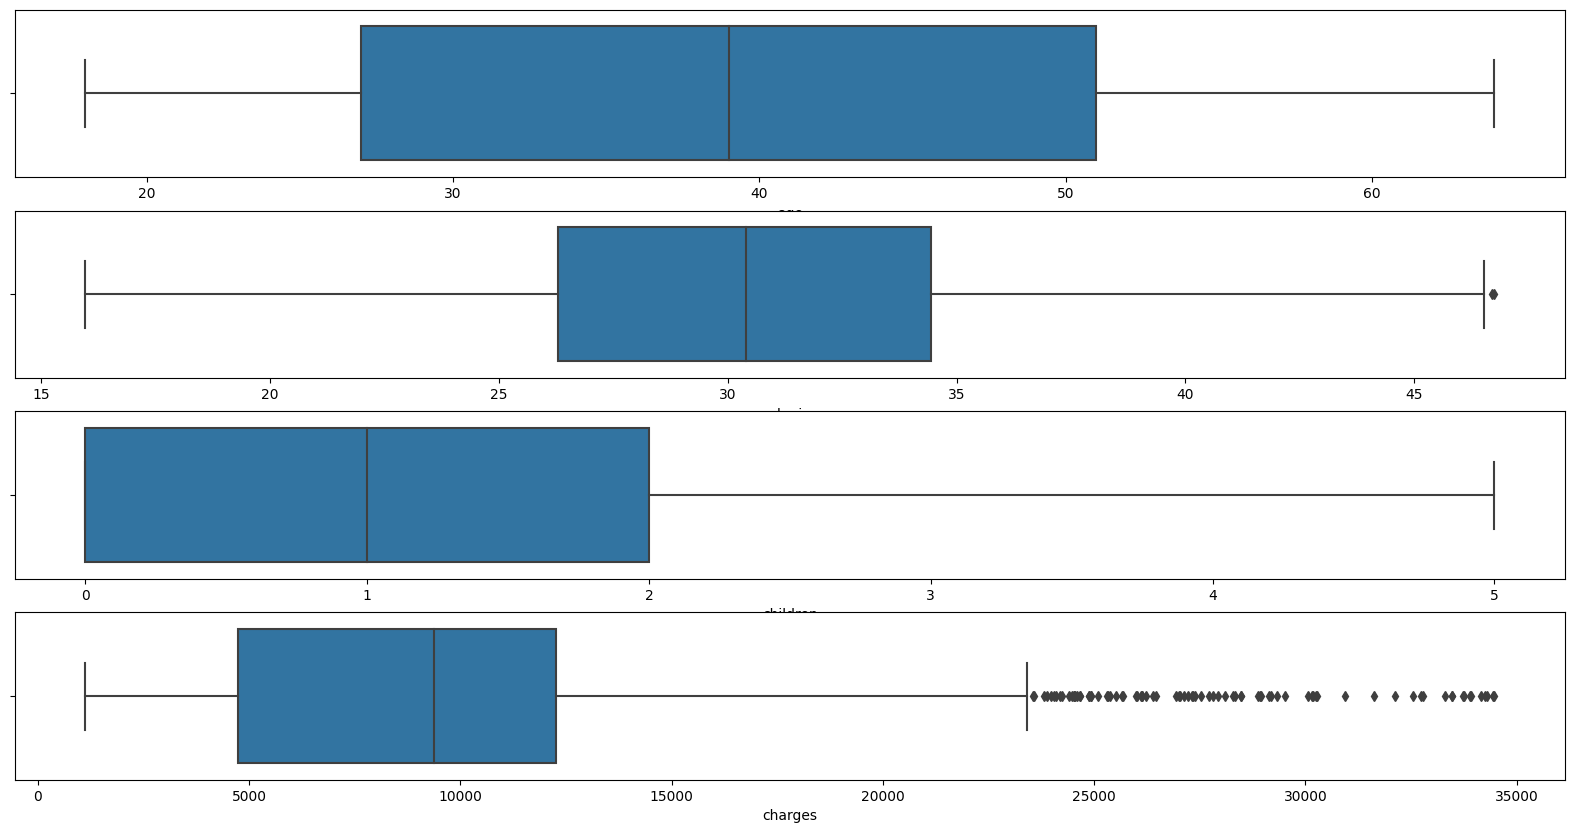

In [33]:
fig, ax = plt.subplots(4, 1, figsize=(20,10))

for i in range(len(columnas_numeric)):
    sns.boxplot(x=columnas_numeric[i], data=df_numericas2, ax=ax[i])
plt.show()

In [34]:
# Aplicamos la función y sacamos los índices de los outliers
# ==============================================================================

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'bmi': [438, 547], 'charges': [9, 11, 52, 57, 62, 92, 103, 115, 128, 138, 140, 219, 227, 244, 245, 259, 262, 289, 301, 321, 331, 355, 379, 387, 419, 443, 444, 474, 475, 491, 503, 516, 520, 526, 539, 545, 573, 599, 607, 618, 637, 641, 655, 658, 664, 688, 696, 770, 783, 806, 843, 854, 876, 886, 890, 911, 925, 936, 959, 964, 966, 980, 987, 1001, 1007, 1019, 1042, 1053, 1093, 1112, 1120, 1142, 1176, 1196, 1211, 1223, 1258, 1265, 1267, 1281, 1308, 1321, 1337]}


In [50]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

In [51]:
# nos hacemos un subset solo con las numéricas
# ==============================================================================

num = df.select_dtypes(include = np.number)
num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [52]:
columnas = num.columns
columnas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

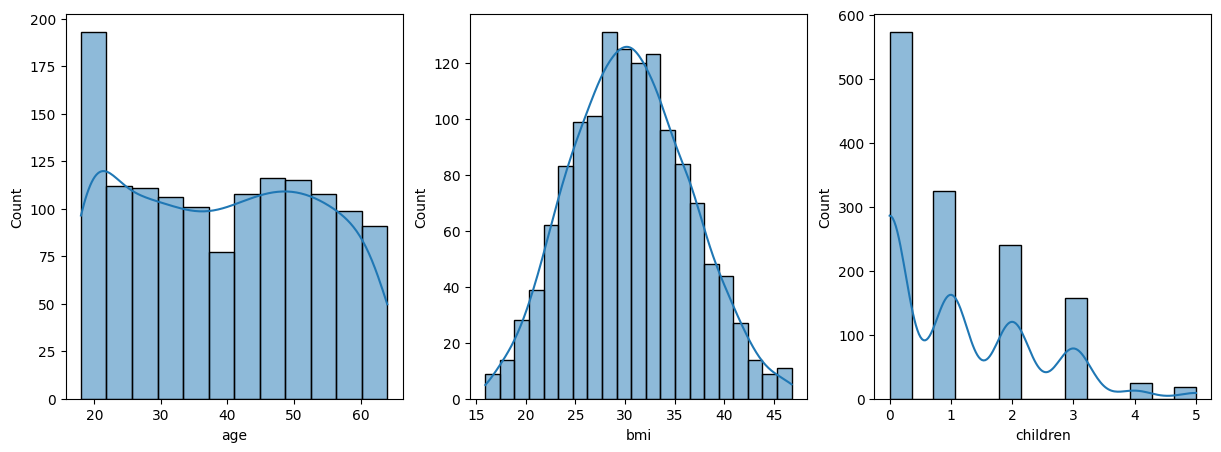

In [53]:
fig, ax = plt.subplots(1,4, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(columnas):
    sns.histplot(data = num, x = columna, kde = True, ax = ax[i])
    
fig.delaxes(ax[-1])
plt.show()

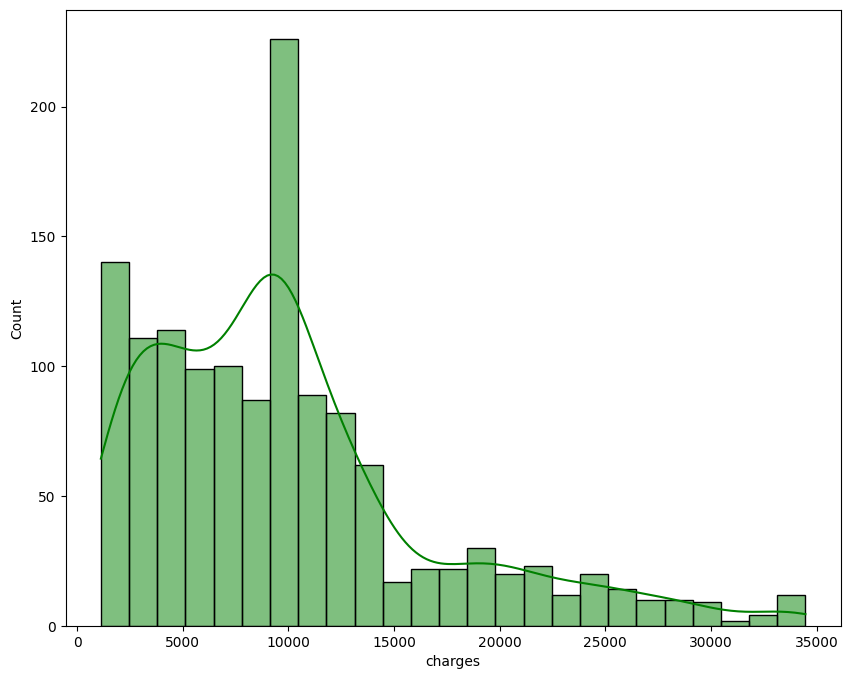

In [54]:
sns.histplot(df["charges"], 
             kde = True, 
             color = "green");

In [55]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.8912188410758972, pvalue=1.0749473412619908e-29)

In [57]:
# vamos a crear distintas variables con los estadísticos que necesitamos
# ==============================================================================

media = df["charges"].mean()
maximo = df["charges"].max() 
minimo = df["charges"].min()

In [58]:

df["charges_NORM"] = (df["charges"] - media) / (maximo - minimo )

In [59]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_NORM
0,19,female,27.90,0,yes,southwest,16884.9240,0.210107
1,18,male,33.77,1,no,southeast,1725.5523,-0.244434


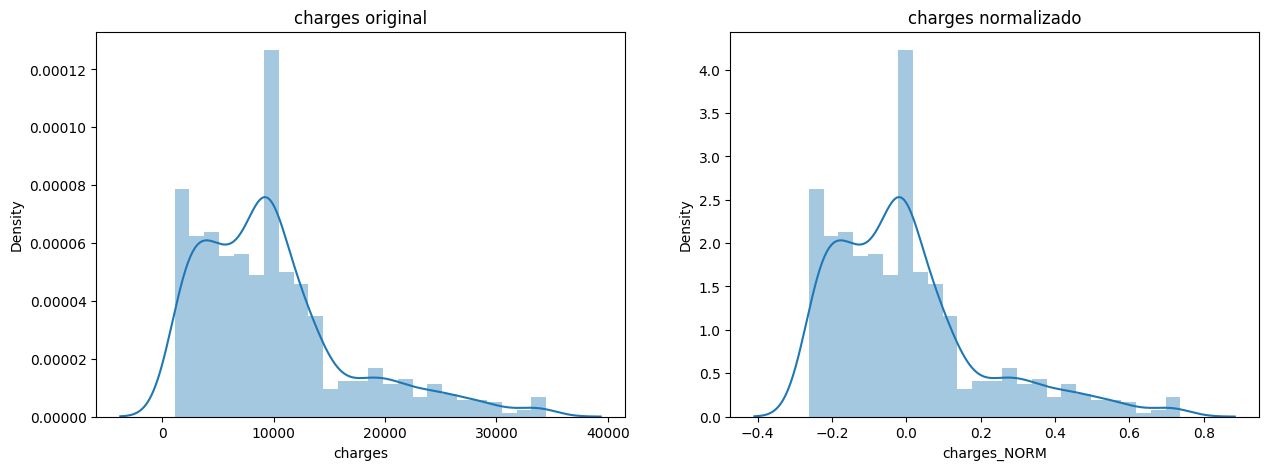

In [61]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df['charges_NORM'], ax = axes[1]);

In [63]:
stats.shapiro(df["charges_NORM"])

ShapiroResult(statistic=0.8912189602851868, pvalue=1.0749938344145545e-29)

In [65]:
df['charges_LOG'] = df['charges'].apply(lambda x: np.log(x) if x != 0 else 0)

In [67]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG
0,19,female,27.90,0,yes,southwest,16884.9240,0.210107,9.734176
1,18,male,33.77,1,no,southeast,1725.5523,-0.244434,7.453302


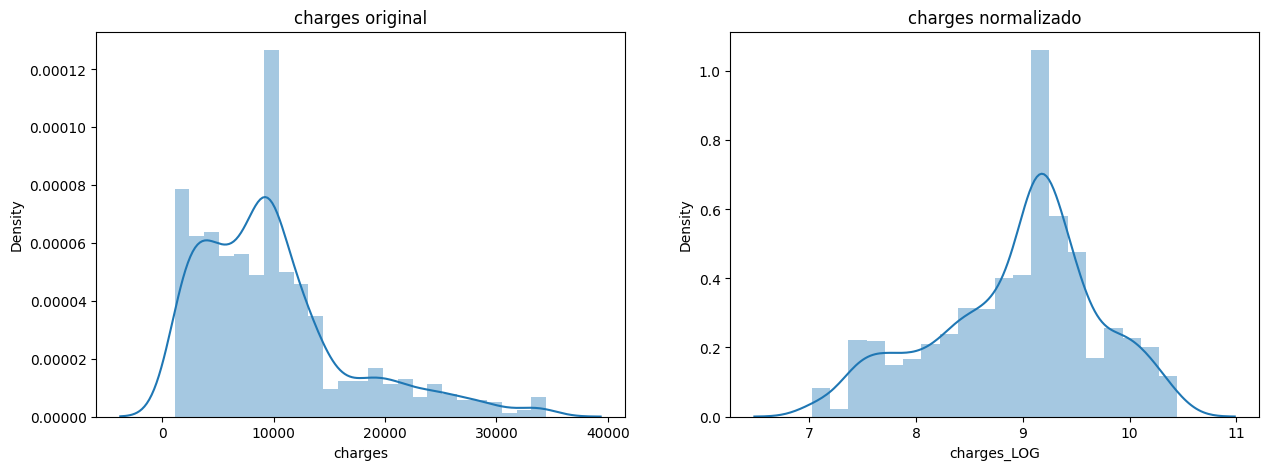

In [68]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df['charges_LOG'], ax = axes[1]);

In [70]:
stats.shapiro(df["charges_LOG"])

ShapiroResult(statistic=0.9702390432357788, pvalue=5.766717301333116e-16)

In [71]:
df['charges_SQRT'] = df['charges'].apply(lambda x: math.sqrt(x))

In [72]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG,charges_SQRT
0,19,female,27.90,0,yes,southwest,16884.9240,0.210107,9.734176,129.942002
1,18,male,33.77,1,no,southeast,1725.5523,-0.244434,7.453302,41.539768


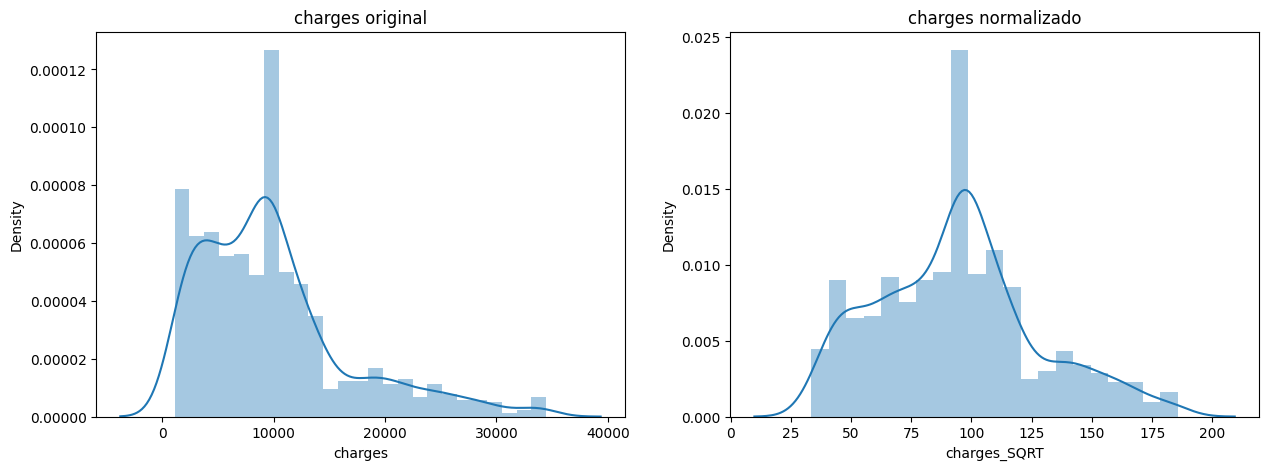

In [73]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df['charges_SQRT'], ax = axes[1]);

In [75]:
stats.shapiro(df["charges_SQRT"])

ShapiroResult(statistic=0.9724769592285156, pvalue=2.7814512168098868e-15)

In [76]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [77]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[["charges"]])

MinMaxScaler()

In [78]:
# transformamos los datos
X_normalizadas = minmax.transform(df[["charges"]])

In [79]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)

array([0.])

In [80]:
# y los máximos?
X_normalizadas.max(axis=0)

array([1.])

In [81]:
# lo unimos a nuestro dataframe original
df["charges_NORM2"] = X_normalizadas

In [82]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG,charges_SQRT,charges_NORM2
0,19,female,27.90,0,yes,southwest,16884.9240,0.210107,9.734176,129.942002,0.472641
1,18,male,33.77,1,no,southeast,1725.5523,-0.244434,7.453302,41.539768,0.018101


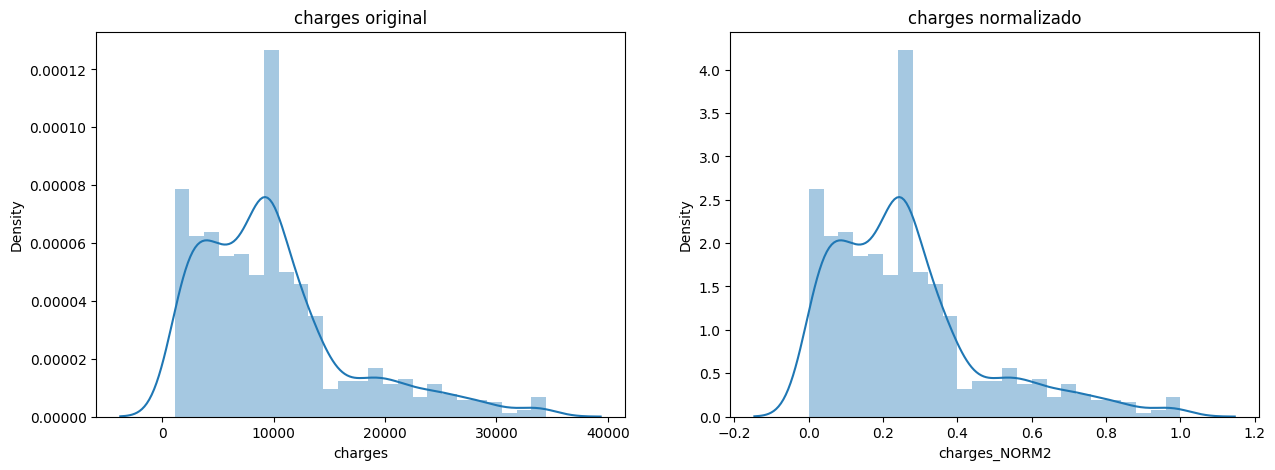

In [83]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df['charges_NORM2'], ax = axes[1]);

In [84]:
stats.shapiro(df["charges_NORM2"])

ShapiroResult(statistic=0.8912189602851868, pvalue=1.0749938344145545e-29)

In [85]:
# antes de empezar importemos las librerías que necesitaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

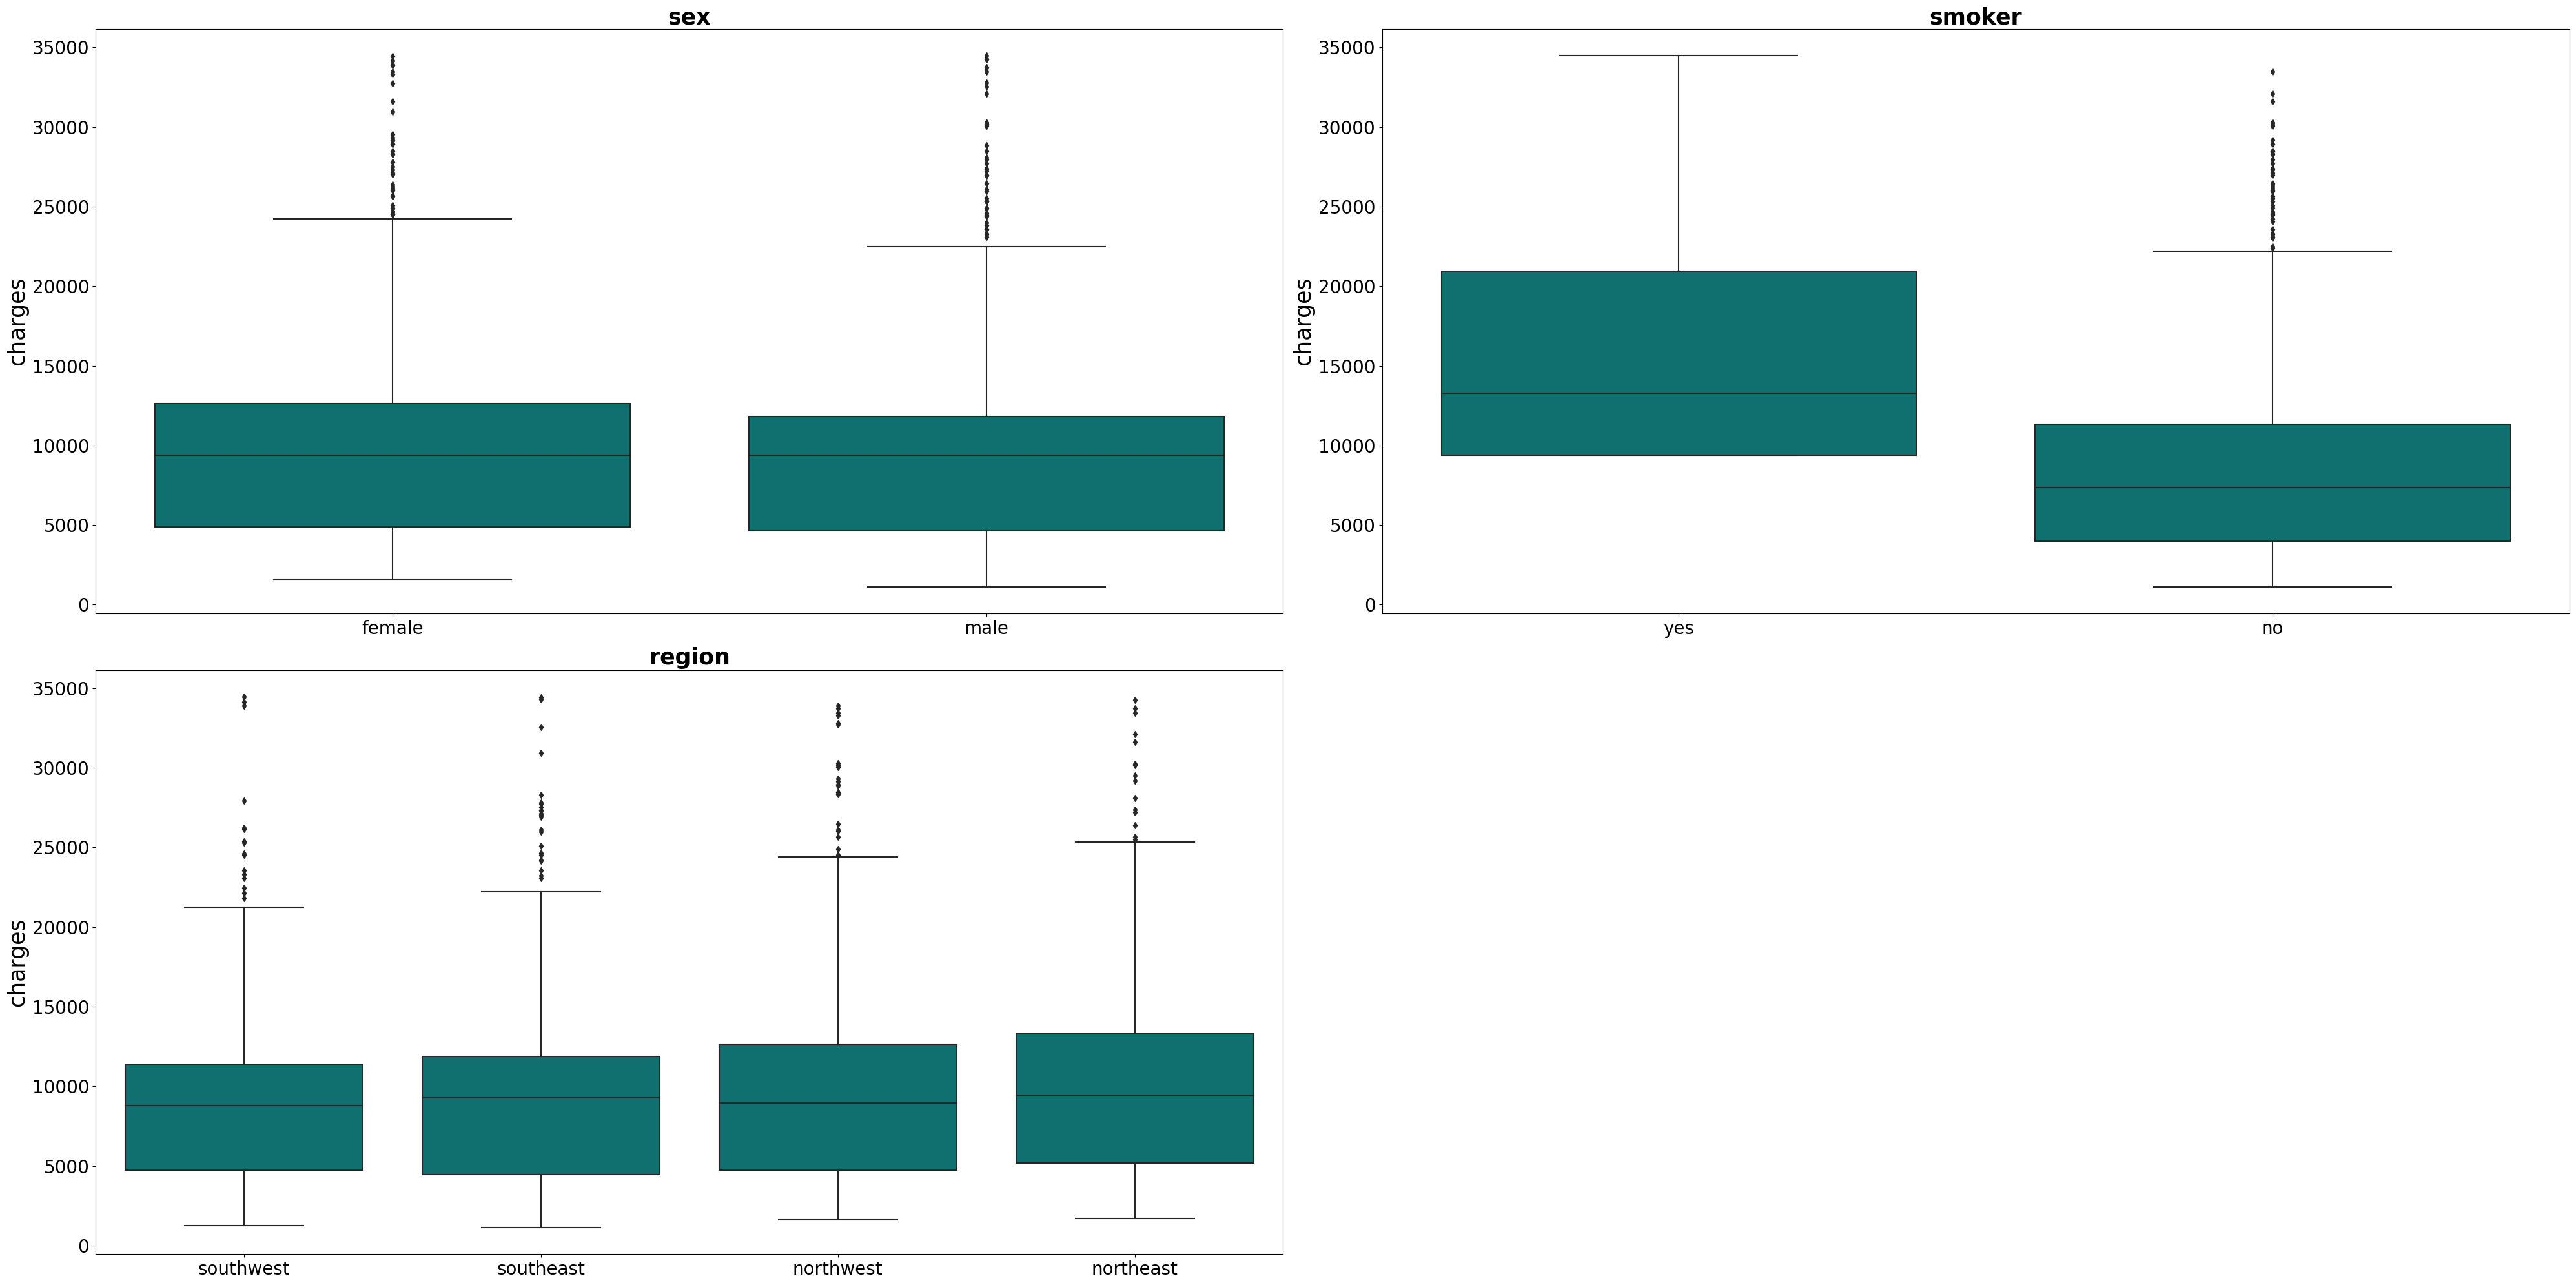

In [86]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "charges",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [87]:
# nos hacemos una copia del dataframe

df1 = df.copy()
df1.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG,charges_SQRT,charges_NORM2
0,19,female,27.900,0,yes,southwest,16884.92400,0.210107,9.734176,129.942002,0.472641
1,18,male,33.770,1,no,southeast,1725.55230,-0.244434,7.453302,41.539768,0.018101
2,28,male,33.000,3,no,southeast,4449.46200,-0.162759,8.400538,66.704288,0.099775
3,33,male,22.705,0,no,northwest,21984.47061,0.363013,9.998092,148.271611,0.625547
4,32,male,28.880,0,no,northwest,3866.85520,-0.180228,8.260197,62.184043,0.082306


In [88]:
# iniciamos el método de OneHot Encoder

oh = OneHotEncoder()

In [89]:
# hacemos la codificación de los datos para la variable dada 

transformados = oh.fit_transform(df1[["region"]])
type(transformados)

scipy.sparse._csr.csr_matrix

In [90]:
# convertimos nuestro array con la codificación hecha en un dataframe

oh_df = pd.DataFrame(transformados.toarray(), dtype = int)
oh_df.head()

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [91]:
# el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
oh_df.columns = oh.get_feature_names_out()

In [92]:
oh_df.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [97]:
df1[oh_df.columns] = oh_df
df1.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG,charges_SQRT,charges_NORM2,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.210107,9.734176,129.942002,0.472641,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,-0.244434,7.453302,41.539768,0.018101,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,-0.162759,8.400538,66.704288,0.099775,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.363013,9.998092,148.271611,0.625547,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,-0.180228,8.260197,62.184043,0.082306,0.0,1.0,0.0,0.0


In [95]:
# vamos a definir una función que nos aplique este método

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff

In [96]:
# volvemos a hacermos una copia para probar nuestra función con dos columnas

df2 = df.copy()
df2.head()

,age,sex,bmi,children,smoker,region,charges,charges_NORM,charges_LOG,charges_SQRT,charges_NORM2
0,19,female,27.900,0,yes,southwest,16884.92400,0.210107,9.734176,129.942002,0.472641
1,18,male,33.770,1,no,southeast,1725.55230,-0.244434,7.453302,41.539768,0.018101
2,28,male,33.000,3,no,southeast,4449.46200,-0.162759,8.400538,66.704288,0.099775
3,33,male,22.705,0,no,northwest,21984.47061,0.363013,9.998092,148.271611,0.625547
4,32,male,28.880,0,no,northwest,3866.85520,-0.180228,8.260197,62.184043,0.082306
